In [ ]:
# Enrico Borriello
# Feb 26, 2020

In [156]:
from scipy.integrate import quad
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ]-\infty, +\infty[

In [16]:
def gaussian(x, mu, sig):
    return (1./(np.sqrt(2.*np.pi)*sig))*np.exp(-np.power((x - mu)/sig, 2.)/2)

def pint(x,xp,H):
    d = abs(x-xp)
    return np.power(2,-1.*d/H)

In [112]:
#parameters:
mu = 0
sigma = .2
T = 1.
H = 1.
M = 0.25


xmin = -5
xmax =  5
# These values might need to be updated during the runs

# check the normalization
def rho(x):
    # rho is set to zero outside [xmin,xmax].
    # Ignore runs that spread outside this interval,
    # and reset the bounds to higher values.
    if x >= xmin and x <= xmax:
        return gaussian(x,mu,sigma)
    else:
        return 0

ans, err = quad (rho,2*xmin,2*xmax)
print ans

1.0


In [113]:
bin_step = 1.*(xmax - xmin)/1000
x_range = np.arange(xmin,xmax,bin_step)
print('sampling zize = '+str(len(x_range))+' points')

sampling zize = 1000 points


In [114]:
def integrandLm(xp):
    # integrand of the 2nd term in eq. (3)
        return pint(x,xp,H)*rho(xp)

def integrandRm(xp):
    # integrand of the 3rd term in eq. (3). 
    # Actually the same as Lm
        return pint(x,xp,H)*rho(xp)

def integrandLp(xp):
    # integrand of the 4th term in eq. (3). 
        return pint(x+M,xp,H)*rho(xp)

def integrandRp(xp):
    # integrand of the 5th term in eq. (3). 
        return pint(x-M,xp,H)*rho(xp)

In [115]:
# Integration of the 2nd term
# minus sign NOT included
int_DL_minus = []
for x in x_range:
    ans1, err1 = quad(integrandLm,xmin,x-T)
    ans2, err2 = quad(integrandLm,x,x+T)
    int_DL_minus.append(ans1+ans2)

In [116]:
# Integration of the 3rd term
# minus sign NOT included
int_DR_minus = []
for x in x_range:
    ans1, err1 = quad(integrandRm,x-T,x)
    ans2, err2 = quad(integrandRm,x+T,xmax)
    int_DR_minus.append(ans1+ans2)

In [117]:
# Integration of the 4th term
int_DL_plus = []
for x in x_range:
    ans1, err1 = quad(integrandLp,xmin,x+M-T)
    ans2, err2 = quad(integrandLp,x+M,x+M+T)
    int_DL_plus.append(ans1+ans2)

In [118]:
# Integration of the 5th term
int_DR_plus = []
for x in x_range:
    ans1, err1 = quad(integrandRp,x-M-T,x-M)
    ans2, err2 = quad(integrandRp,x-M+T,xmax)
    int_DR_plus.append(ans1+ans2)

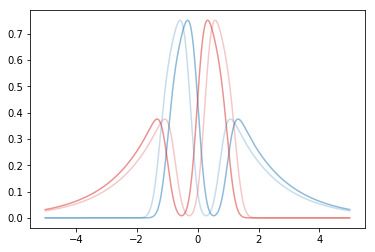

In [119]:
plt.plot(x_range,int_DL_minus,c='tab:blue',alpha=.5)
plt.plot(x_range,int_DR_minus,c='tab:red',alpha=.5)
plt.plot(x_range,int_DL_plus,c='tab:blue',alpha=.25)
plt.plot(x_range,int_DR_plus,c='tab:red',alpha=.25)

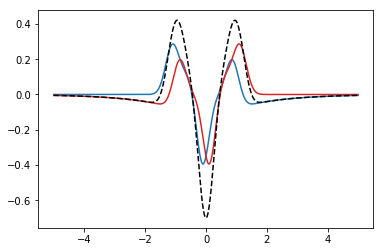

In [124]:
L_shift = -np.array(int_DL_minus)+np.array(int_DL_plus)
R_shift = -np.array(int_DR_minus)+np.array(int_DR_plus)

shift = L_shift + R_shift

plt.plot(x_range, L_shift, c='tab:blue')
plt.plot(x_range, R_shift, c='tab:red');
plt.plot(x_range, shift, '--',c='black');


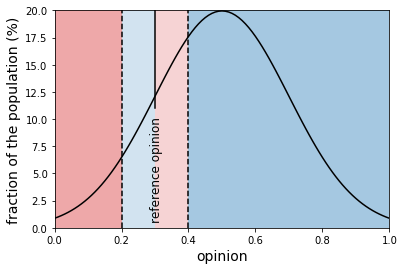

In [161]:
fig, ax = plt.subplots()
plt.plot(x_range,10*gaussian(x_range,mu,sigma),'k');

x = .3

plt.plot([x,x],[11,20],'k')
plt.plot([x-T,x-T],[0,20],'k--')
plt.plot([x+T,x+T],[0,20],'k--')

ax.fill_between([0,x-T], 0,20,facecolor='tab:red', alpha=0.4);
ax.fill_between([x-T,x], 0,20,facecolor='tab:blue', alpha=0.2);
ax.fill_between([x,x+T], 0,20,facecolor='tab:red', alpha=0.2);
ax.fill_between([x+T,1], 0,20,facecolor='tab:blue', alpha=0.4);

ax.text(.285, 0.5, "reference opinion", rotation=90, va='bottom',size=12);

plt.xlim(0,1)
plt.ylim(0,20)

plt.xlabel('opinion',size=14)
plt.ylabel('fraction of the population (%)',size=14);

plt.savefig('dist1.pdf')

In [162]:
PL=[100*pL[i] for i in range(len(pL))]
PR=[100*pR[i] for i in range(len(pR))]

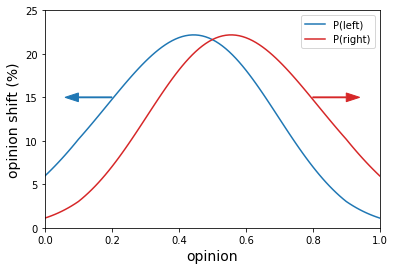

In [164]:
plt.plot(x_range,PL,'tab:blue',label='P(left)');
plt.plot(x_range,PR,'tab:red',label='P(right)');


plt.xlim(0,1)
plt.ylim(0,25)

plt.xlabel('opinion',size=14)
plt.ylabel('opinion shift (%)',size=14);

plt.arrow(.8, 15, .1, 0,head_width =1,head_length = 0.04, 
          width = 0.1, 
          ec ='tab:red',fc ='tab:red')

plt.arrow(.2, 15, -.1, 0,head_width =1,head_length = 0.04, 
          width = 0.1, 
          ec ='tab:blue',fc ='tab:blue')

plt.legend();

plt.savefig('shift1.pdf')

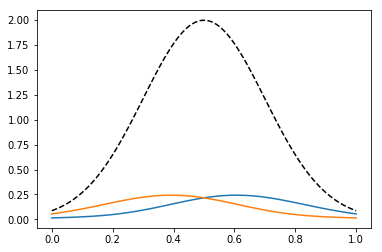

In [154]:
interp_pL = interpolate.interp1d(x_range, pL, kind = "cubic")
interp_pR = interpolate.interp1d(x_range, pR, kind = "cubic")

pL_check = interp_pL(x_range)
pR_check = interp_pR(x_range)

plt.plot(x_range, gaussian(x_range,.5,.2),   "k--", label = "opinion density")
plt.plot(x_range, pL_check,   "-", label = "Cubic")
plt.plot(x_range, pR_check,   "-", label = "Cubic");

In [155]:
gaussian(.2, .5, .2)*interp_pL(.2)

0.031964551131982558

In [ ]:
mu = .5
sig = .2
M=.1

def xi(xp):
    # this needs to go inside pR.
    # It corrects those cases when xp < 0 
    # because the shift of its argument to the left 
    # by an amount M
    return max(0,xp)

def eta(xp):
    # this goes inside pL.
    # It corrects cases with xp > 1
    return min(xp,1)

def convolution(x):
    initial_rho = gaussian(x,mu,sig)
    L_shift = interp_pL(x)*gaussian(x,mu,sig) # to go with a minus sign
    R_shift = interp_pR(x)*gaussian(x,mu,sig) # to go with a minus sign
    shift_from_R = interp_pL(eta(x+M))*gaussian(eta(x+M),mu,sig) # + sign, these were R people moving L # eta correction needed
    shift_from_L = interp_pR( xi(x-M))*gaussian(xi(x-M),mu,sig)  # + sign, these were L people moving R # xi correction needed
    return initial_rho -L_shift -R_shift +shift_from_R + shift_from_L

In [ ]:
inner_x_range = np.arange(0,1+bin_step,bin_step)
conv = [convolution(x) for x in inner_x_range]

In [ ]:
plt.plot(inner_x_range,conv);
plt.plot(x_range, gaussian(x_range,.5,.2),   "k--", label = "opinion density")

# 1st Run

In [1]:
from scipy.integrate import quad
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
#parameters:

mu = .5
sig = .2
T = 0.4
H = 0.1
M=.1

In [116]:
# generate initial distribution

bin_step = 0.01
x_range = np.arange(0,1+bin_step,bin_step) # THIS WILL BE AN INPUT

In [117]:
# define the input distribution
# in Axelrod Daymude Forrest, that's a normal distribution

def gaussian(x, mu, sig):
    return (1./(np.sqrt(2.*np.pi)*sig))*np.exp(-np.power((x - mu)/sig, 2.)/2)

input_dist = gaussian(x_range, mu, sig) # THIS WILL BE AN INPUT

# interpolate the input distribution

rho = interpolate.interp1d(x_range, input_dist, kind = "cubic")

In [118]:
# define pR and pL for that given input distribution
# pR and pL WILL BE PART OF THE OUTPUTS
# make sure you always refer to the x_range input whenever binning is involved

def pint(x,xp,H):
    d = abs(xp-x)
    return np.power(2,-1.*d/H)

def integrand(xp):
    return rho(xp)*pint(x,xp,H)

# pR
pR = []
for x in x_range:
    ans1plus, err1plus = quad(integrand,0,max(0,x-T))
    ans2plus, err2plus = quad(integrand,x,min(x+T,1))
    pR.append(ans1plus + ans2plus)
    
#pL
pL = []
for x in x_range:
    ans1minus, err1minus = quad(integrand,max(0,x-T),x)
    ans2minus, err2minus = quad(integrand,min(x+T,1),1)
    pL.append(ans1minus + ans2minus)

In [119]:
#plt.plot(x_range,rho(x_range))
#plt.plot(x_range,input_dist)
#plt.plot(x_range,pR)
#plt.plot(x_range,pL)

In [120]:
# interpolate pL and pR

interp_pL = interpolate.interp1d(x_range, pL, kind = "cubic")
interp_pR = interpolate.interp1d(x_range, pR, kind = "cubic")

#pL_check = interp_pL(x_range)
#pR_check = interp_pR(x_range)
#plt.plot(x_range, gaussian(x_range,.5,.2),   "k--", label = "opinion density")
#plt.plot(x_range, pL_check,   "-", label = "Cubic")
#plt.plot(x_range, pR_check,   "-", label = "Cubic");

In [121]:
# We now start fixing the boundary effects

def xi(xp):
    # this needs to go inside interp_pR.
    # It corrects those cases when xp < 0 
    # because the shift of its argument to the left 
    # by an amount M
    return max(0,xp)

def eta(xp):
    # this goes inside interp_pL.
    # It corrects cases with xp > 1
    return min(xp,1)

In [122]:
# We now generate the new distribution
# we still need to fix the "epsilon bins"

def convolution(x):
    initial_rho = rho(x)
    L_shift = interp_pL(x)*rho(x) # to go with a minus sign
    R_shift = interp_pR(x)*rho(x) # to go with a minus sign
    shift_from_R = interp_pL(eta(x+M))*rho(eta(x)) # + sign, these were R people moving L # eta correction needed
    shift_from_L = interp_pR( xi(x-M))*rho(xi(x))  # + sign, these were L people moving R # xi correction needed
    return initial_rho -L_shift -R_shift +shift_from_R + shift_from_L

# use this function only when epsilon < x < 1-epsilon

In [123]:
output_dist_temp = [convolution(x) for x in x_range]

In [124]:
print 'convolution(0) = '+str(convolution(0))
print 'convolution(1) = '+str(convolution(1))

convolution(0) = 0.0885949787578
convolution(1) = 0.0885949787578


In [125]:
epsilon = 1*bin_step

def integrand_R(x):
    return interp_pR(x)*rho(x)

def integrand_L(x):
    return interp_pL(x)*rho(x)

# rho1

ans, err = quad (integrand_R,1-M-epsilon,1)
incoming1 = ans

ans, err = quad (integrand_L,1-epsilon,1)
outgoing1 = ans

ans, err = quad (rho,1-epsilon,1)
previous1 = ans

rho1 = (previous1 + incoming1 - outgoing1)/epsilon

#rho0

ans, err = quad (integrand_L,0,M+epsilon)
incoming0 = ans

ans, err = quad (integrand_R,0,epsilon)
outgoing0 = ans

ans, err = quad (rho,0,epsilon)
previous0 = ans

rho0 = (previous0 + incoming0 - outgoing0)/epsilon

print 'epsilon = '+str(epsilon)

print 'rho0 = '+str(rho0)
print 'rho1 = '+str(rho1)

epsilon = 0.01
rho0 = 0.130666762703
rho1 = 0.130666762703


In [126]:
def output_dist_function(x):
    if x <= epsilon:
        return rho0
    if x > epsilon and x < 1-epsilon:
        return convolution(x)
    if x >= 1-epsilon:
        return rho1

In [127]:
output_dist = [output_dist_function(x) for x in x_range]

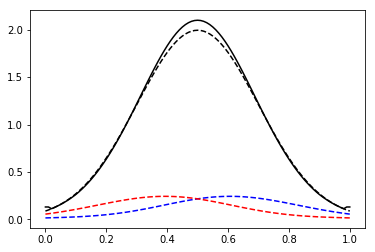

In [128]:
plt.plot(x_range,input_dist,'k--')
plt.plot(x_range,output_dist,'k')
plt.plot(x_range,pL,'b--')
plt.plot(x_range,pR,'r--')

# Iteration

In [135]:
input_dist = output_dist
rho = interpolate.interp1d(x_range, input_dist, kind = "cubic")

In [136]:
def pint(x,xp,H):
    d = abs(xp-x)
    return np.power(2,-1.*d/H)

def integrand(xp):
    return rho(xp)*pint(x,xp,H)

# pR
pR = []
for x in x_range:
    ans1plus, err1plus = quad(integrand,0,max(0,x-T))
    ans2plus, err2plus = quad(integrand,x,min(x+T,1))
    pR.append(ans1plus + ans2plus)
    
#pL
pL = []
for x in x_range:
    ans1minus, err1minus = quad(integrand,max(0,x-T),x)
    ans2minus, err2minus = quad(integrand,min(x+T,1),1)
    pL.append(ans1minus + ans2minus)
    
interp_pL = interpolate.interp1d(x_range, pL, kind = "cubic")
interp_pR = interpolate.interp1d(x_range, pR, kind = "cubic")

def convolution(x):
    initial_rho = rho(x)
    L_shift = interp_pL(x)*rho(x) # to go with a minus sign
    R_shift = interp_pR(x)*rho(x) # to go with a minus sign
    shift_from_R = interp_pL(eta(x+M))*rho(eta(x)) # + sign, these were R people moving L # eta correction needed
    shift_from_L = interp_pR( xi(x-M))*rho(xi(x))  # + sign, these were L people moving R # xi correction needed
    return initial_rho -L_shift -R_shift +shift_from_R + shift_from_L

epsilon = 1*bin_step

def integrand_R(x):
    return interp_pR(x)*rho(x)

def integrand_L(x):
    return interp_pL(x)*rho(x)

# rho1

ans, err = quad (integrand_R,1-M-epsilon,1)
incoming1 = ans

ans, err = quad (integrand_L,1-epsilon,1)
outgoing1 = ans

ans, err = quad (rho,1-epsilon,1)
previous1 = ans

rho1 = (previous1 + incoming1 - outgoing1)/epsilon

#rho0

ans, err = quad (integrand_L,0,M+epsilon)
incoming0 = ans

ans, err = quad (integrand_R,0,epsilon)
outgoing0 = ans

ans, err = quad (rho,0,epsilon)
previous0 = ans

rho0 = (previous0 + incoming0 - outgoing0)/epsilon

def output_dist_function(x):
    if x <= epsilon:
        return rho0
    if x > epsilon and x < 1-epsilon:
        return convolution(x)
    if x >= 1-epsilon:
        return rho1

output_dist = [output_dist_function(x) for x in x_range]

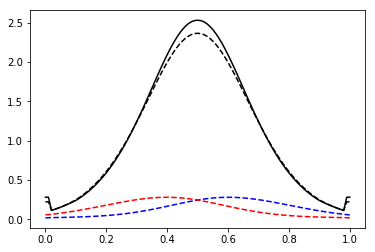

In [137]:
plt.plot(x_range,input_dist,'k--')
plt.plot(x_range,output_dist,'k')
plt.plot(x_range,pL,'b--')
plt.plot(x_range,pR,'r--')